# Enron EDA
### By Luiz Schiller

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [19]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,13868,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,56301,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,11200,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,129142,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [20]:
df.replace('NaN', np.nan, inplace = True)
email_features = ['email_address', 'to_messages', 'from_messages', 'from_this_person_to_poi', 
                  'from_poi_to_this_person', 'shared_receipt_with_poi']
financial_features = ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 
                      'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 
                      'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']
labels = ['poi']
df[email_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 6 columns):
email_address              111 non-null object
to_messages                86 non-null float64
from_messages              86 non-null float64
from_this_person_to_poi    86 non-null float64
from_poi_to_this_person    86 non-null float64
shared_receipt_with_poi    86 non-null float64
dtypes: float64(5), object(1)
memory usage: 8.0+ KB


In [21]:
df[financial_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 14 columns):
salary                       95 non-null float64
bonus                        82 non-null float64
long_term_incentive          66 non-null float64
deferred_income              49 non-null float64
deferral_payments            39 non-null float64
loan_advances                4 non-null float64
other                        93 non-null float64
expenses                     95 non-null float64
director_fees                17 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
dtypes: float64(14)
memory usage: 17.1+ KB


In [22]:
df[labels].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 1 columns):
poi    146 non-null bool
dtypes: bool(1)
memory usage: 1.3+ KB


In [26]:
len(df[df['poi']])

18

There are 146 entries and 21 variables - 6 email features, 14 financial features and 1 poi label. A lot of missing values.
18 POI's and 128 non-POI's.

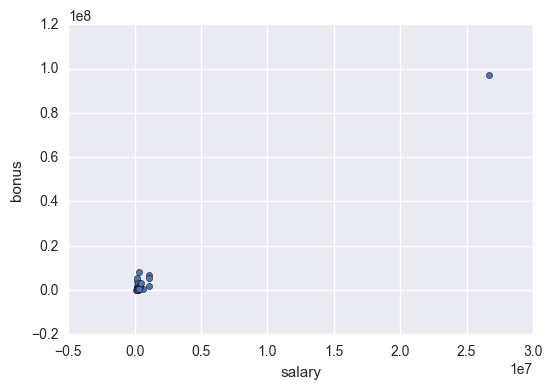

In [23]:
df.plot.scatter(x = 'salary', y = 'bonus')

There is a salary bigger than 2.5 *10^7 🤔. It seems too much even for Enron. Let's investigate it a little further.

In [24]:
df[df['salary'] > 2.5 * 10**7]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,5235198.0,83925000.0,NaN,42667589.0,NaN,False,1398517.0,-27992891.0,48521928.0,NaN,NaN


This huge salary is the TOTAL of the salaries of the listed employees, so I'm going to remove it.

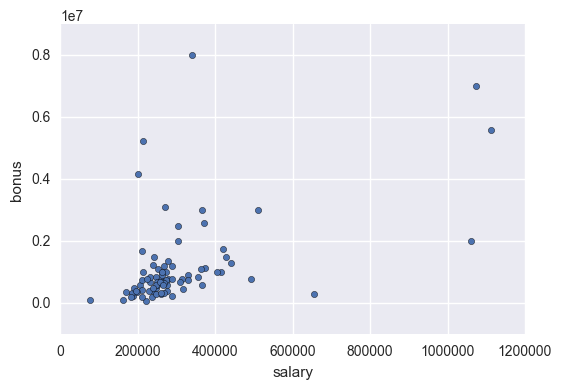

In [25]:
df.drop('TOTAL', inplace = True)
df.plot.scatter(x = 'salary', y = 'bonus')

In [16]:
len(df)

145

In [ ]:
for col in df:
    df[col]

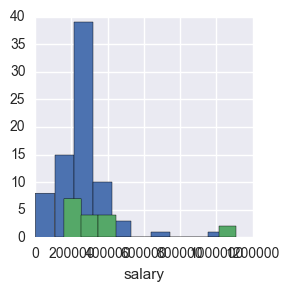

In [28]:
fg = sns.FacetGrid(data=df, hue='poi')
fg.map(plt.hist, 'salary')

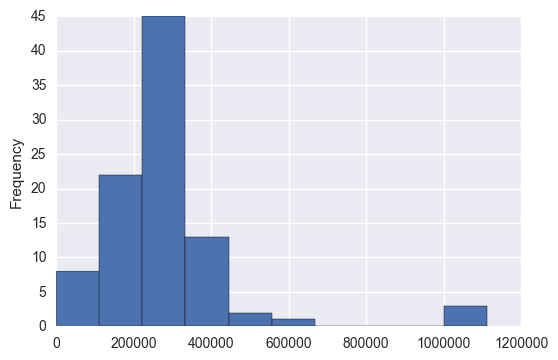

In [33]:
df['salary'].plot.hist(by='poi')